# This is a sample for how to run LSTM to learn a sequence
*adapted from [here](http://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/)*

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import numpy as np
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Generate or Load data

In [3]:
# fix random seed for reproducibility
np.random.seed(7)

# generate sine
Fs = 32000 # sample rate 
Freq = 1000 # frequency
samples = 64 # samples
t = np.linspace(0, 1/Fs * samples, samples) # generate samples
sine = .5 * np.sin(2 * np.pi * Freq * t)
sine = sine + .5; # offset

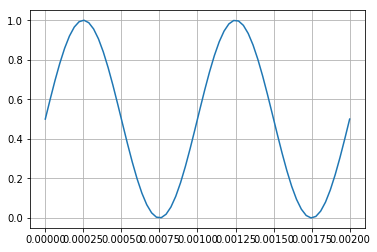

In [4]:
plt.plot(t, sine)
plt.grid()

In [5]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 1
dataX = []
dataY = []

for i in range(0, len(sine) - seq_length, 1):
    seq_in = [sine[i:i + seq_length]]
    seq_out = sine[i + seq_length]
    dataX.append(seq_in)
    dataY.append(seq_out)
    print(seq_in, '->', seq_out)

[array([ 0.5])] -> 0.5990730716
[array([ 0.59907307])] -> 0.694217398137
[array([ 0.6942174])] -> 0.781660029032
[array([ 0.78166003])] -> 0.85793342463
[array([ 0.85793342])] -> 0.920012961575
[array([ 0.92001296])] -> 0.965436874322
[array([ 0.96543687])] -> 0.992403876506
[array([ 0.99240388])] -> 0.999844591
[array([ 0.99984459])] -> 0.987463956091
[array([ 0.98746396])] -> 0.955752926156
[array([ 0.95575293])] -> 0.905969002858
[array([ 0.905969])] -> 0.840086368885
[array([ 0.84008637])] -> 0.76071760169
[array([ 0.7607176])] -> 0.671010071663
[array([ 0.67101007])] -> 0.574521133088
[array([ 0.57452113])] -> 0.47507705717
[array([ 0.47507706])] -> 0.376621301155
[array([ 0.3766213])] -> 0.283058130441
[array([ 0.28305813])] -> 0.198097794837
[array([ 0.19809779])] -> 0.125109398516
[array([ 0.1251094])] -> 0.0669872981078
[array([ 0.0669873])] -> 0.0260363269164
[array([ 0.02603633])] -> 0.00388039669991
[array([ 0.0038804])] -> 0.00139810140941
[array([ 0.0013981])] -> 0.018687

In [6]:
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (len(dataX), seq_length, 1))

y = np.reshape(dataY, (len(dataY), 1))
print(X.shape)
print(y.shape)

(63, 1, 1)
(63, 1)


In [7]:
# create and fit the model
model = Sequential()
model.add(LSTM(2, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X, y, epochs=1000, batch_size=len(dataX), verbose=0, shuffle=False)

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(model.predict(X), y))
print('Train Score (less is better): %.2f RMSE' % (trainScore))

Train Score (less is better): 0.08 RMSE


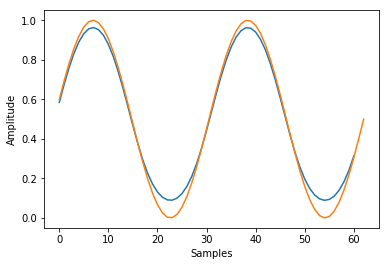

In [8]:
# print(model.predict(X))
# plt.plot(model.predict(X[1:30,:]))
plt.plot(model.predict(X)[1:-1])
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(y)

In [ ]:
# Generate
generated_signal = []
initial_predict = model.predict(X[2:3,:])
samp = initial_predict;
preds = []

print("first values", X[2:6,].flatten())
for i in range(1,5):
    generated_signal.append(initial_predict[0,0])
    initial_predict = model.predict(np.reshape(initial_predict, (1,1,1)))
    

for i in range(1,5):
    pred = model.predict(X[i+1:i+2,:])
    preds.append(pred[0,0])
                            
# generated_signal
print("pure predictions", preds)
print("gen predictions", generated_signal)
plt.plot(preds)
plt.plot(generated_signal)